# Importing our libraries

In [1]:
# Imports
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from random import sample
from itertools import combinations
from statsmodels.stats.power import TTestIndPower, TTestPower
import math
import seaborn as sns
import scipy as sp
import pandas as pd
from matplotlib.lines import Line2D
import random
import statsmodels.api as sm
from itertools import combinations
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.stats.stattools import jarque_bera
import warnings
warnings.filterwarnings('ignore')

import num_model_all_combos as simple_test

# Creating and cleaning first dataframe

In [2]:
# creating initial data frame
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# checking original df
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052


In [4]:
# checking for nulls
df.isna().sum().sum()

46

In [5]:
# dropping nulls
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


# first baseline model

In [8]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [9]:
# creating baseline model based on highest .corr() to price (ran above)
X = df[['sqft_living']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
# viewing the baseline model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:25:41   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Dropping outliers in sale price

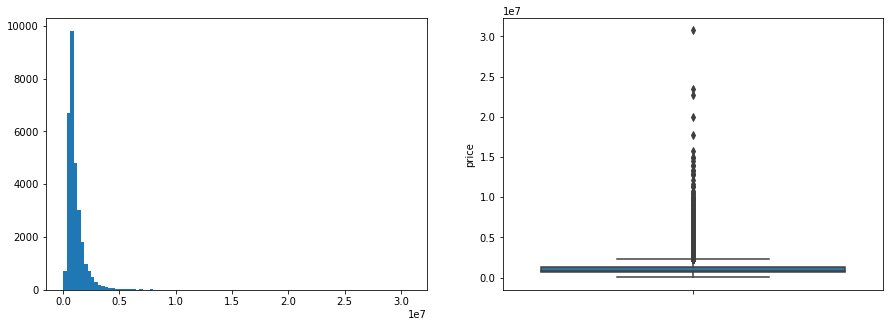

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df['price'], bins=100)
sns.boxplot(y =df['price']);

In [11]:
df_no_outliers = df[(df['price'] > np.percentile(df['price'], .3)) & (df['price'] < np.percentile(df['price'], 99.7))]

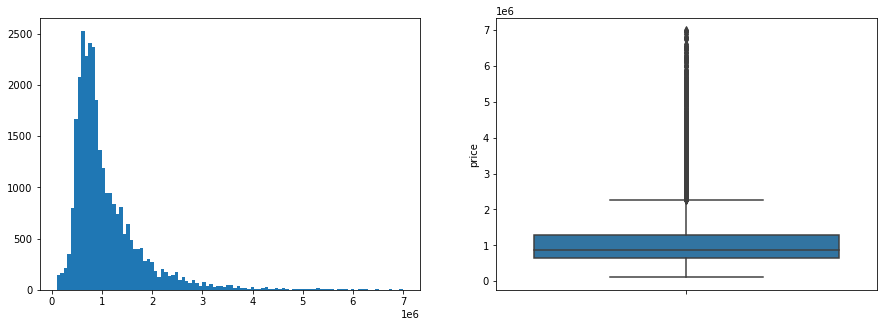

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(df_no_outliers['price'], bins=100)
sns.boxplot(y =df_no_outliers['price']);

In [13]:
df_no_outliers.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.992700e+04,2.992700e+04,29927.000000,29927.000000,29927.000000,2.992700e+04,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000,29927.000000
mean,4.541369e+09,1.084893e+06,3.413673,2.330888,2105.252448,1.657447e+04,1.543222,1804.699368,473.342533,329.974338,215.996959,1975.169746,89.750627,47.328459,-121.321354
std,2.882145e+09,7.201688e+05,0.977299,0.877375,950.536144,5.997309e+04,0.567573,863.246578,572.185345,284.019578,242.024168,32.048907,413.920695,1.428233,5.714484
min,1.000055e+06,1.041860e+05,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.077450e+09,6.500000e+05,3.000000,2.000000,1420.000000,4.840000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.404785,-122.326340
50%,3.876002e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.460000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551305,-122.225740
75%,7.297200e+09,1.300000e+06,4.000000,3.000000,2610.000000,1.050700e+04,2.000000,2270.000000,940.000000,510.000000,312.000000,2003.000000,0.000000,47.670115,-122.116020
max,9.904000e+09,6.995000e+06,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,4520.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


# Dropping irrelevent columns

- Drop ID: just a unique identifier, no helpful info
- Drop lat/long and address. Location not important in this analysis
- Drop year built (not able to change year built)


In [14]:
df_dropped = df_no_outliers.drop(['id', 'address', 'lat', 'long', 'yr_built', 'date', 'sqft_lot', 'waterfront', 'greenbelt', 'view', 'yr_renovated'], axis = 1)

In [15]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29927 entries, 0 to 30154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          29927 non-null  float64
 1   bedrooms       29927 non-null  int64  
 2   bathrooms      29927 non-null  float64
 3   sqft_living    29927 non-null  int64  
 4   floors         29927 non-null  float64
 5   nuisance       29927 non-null  object 
 6   condition      29927 non-null  object 
 7   grade          29927 non-null  object 
 8   heat_source    29927 non-null  object 
 9   sewer_system   29927 non-null  object 
 10  sqft_above     29927 non-null  int64  
 11  sqft_basement  29927 non-null  int64  
 12  sqft_garage    29927 non-null  int64  
 13  sqft_patio     29927 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 3.4+ MB


# Creating a numeric dataframe

In [16]:
df_numeric = df_dropped.drop(['floors'], axis = 1).select_dtypes('number')

In [17]:
df_numeric

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_garage,sqft_patio
0,675000.0,4,1.0,1180,1180,0,0,40
1,920000.0,5,2.5,2770,1570,1570,0,240
2,311000.0,6,2.0,2880,1580,1580,0,0
3,775000.0,3,3.0,2160,1090,1070,200,270
4,592500.0,2,2.0,1120,1120,550,550,30
...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,1600,1130,0,210
30151,1313000.0,3,2.0,2020,2020,0,0,520
30152,800000.0,3,2.0,1620,940,920,240,110
30153,775000.0,3,2.5,2570,1830,740,480,100


# Running baseline simple test after dropping outliers

In [18]:
simple_df = simple_test.simple_num_model_all_combos(df_numeric, 'price')

In [19]:
simple_df

,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,predictor_coef,predictor_p_val
2,sqft_living,0.430194,0.430175,0,38722.8,3.98806e-07,496.933,0
3,sqft_above,0.340758,0.340736,0,206018,9.94432e-151,486.993,0
1,bathrooms,0.267731,0.267706,0,94928.3,6.58601e-21,424716,0
0,bedrooms,0.11369,0.11366,0,236711,9.00519e-62,248466,0
6,sqft_patio,0.0958406,0.0958104,0,885918,0,921.192,0
5,sqft_garage,0.0880874,0.0880569,0,836566,0,752.563,0
4,sqft_basement,0.0566526,0.056621,0,943091,0,299.576,0


# running baseline multi regression after dropping outliers

In [20]:
multi_df, _ = simple_test.multi_num_model_all_combos(df_numeric, 'price')

The top three combos are: 
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.45515322897467025 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage'] 
    	- adj_r2: 0.45287926866078276, 
    	- ratio of p-vals <.05: 100.0
    - ['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio'] 
    	- adj_r2: 0.45246408806886096, 
    	- ratio of p-vals <.05: 100.0


In [21]:
multi_df.head(15)

,index,column,r2,r2_adj,f_stat_p_val,const_coefs,const_p_val,%p_val < .05
0,126,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.455281,0.455153,0,159179,0,100
1,119,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.452989,0.452879,0,168629,0,100
2,124,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.452574,0.452464,0,197896,0,100
3,120,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.451363,0.451253,0,169802,0,100
4,108,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.450018,0.449926,0,209788,0,100
5,121,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.449505,0.449394,0,199265,0,100
6,109,"[bedrooms, sqft_living, sqft_above, sqft_basem...",0.449396,0.449304,0,202106,0,100
7,98,"[bedrooms, bathrooms, sqft_living, sqft_above,...",0.449282,0.44919,0,178530,0,100
8,122,"[bedrooms, bathrooms, sqft_living, sqft_baseme...",0.449202,0.449091,0,209202,0,100
9,103,"[bedrooms, bathrooms, sqft_living, sqft_garage...",0.448785,0.448693,0,209065,0,100


In [22]:
for i in range(15):
    print(multi_df['column'][i+1])

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_garage']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_garage', 'sqft_patio']
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_basement', 'sqft_garage']
['bedrooms', 'sqft_living', 'sqft_above', 'sqft_b

### Col 13 has the least potential for multicollinearity 
#### still has an r-squared of 0.447003	and all coefs stat sig

In [23]:
multi_df['column'][13]

['bedrooms', 'sqft_living', 'sqft_above', 'sqft_basement']

# Running optimized list test to avoid multi-collinearity
### Still has perfect p-values for coefs 

In [24]:
y= df_dropped['price']
X = df_dropped[['sqft_living', 'sqft_garage', 'sqft_patio', 'bathrooms']]

results = sm.OLS(endog = y, exog = sm.add_constant(X)).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     5792.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:26:26   Log-Likelihood:            -4.3752e+05
No. Observations:               29927   AIC:                         8.750e+05
Df Residuals:                   29922   BIC:                         8.751e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.123e+04   8923.266      1.258      0.208   -6262.938    2.87e+04
sqft_living   476.2868      5.484     86.852      0.000     465.538     487.035
sqft_garage  -140.4491     12.874    -10.910      0.000    -165.683    -115.216
sqft_patio    192.7682     14.023     13.746      0.000     165.282     220.255
bathrooms    3.246e+04   5592.398      5.805      0.000    2.15e+04    4.34e+04
==============================================================================
Omnibus:                    14995.692   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202945.475
Skew:                           2.083   Prob(JB):                         0.00
Kurtosis:                      15.058   Cond. No.                     7.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

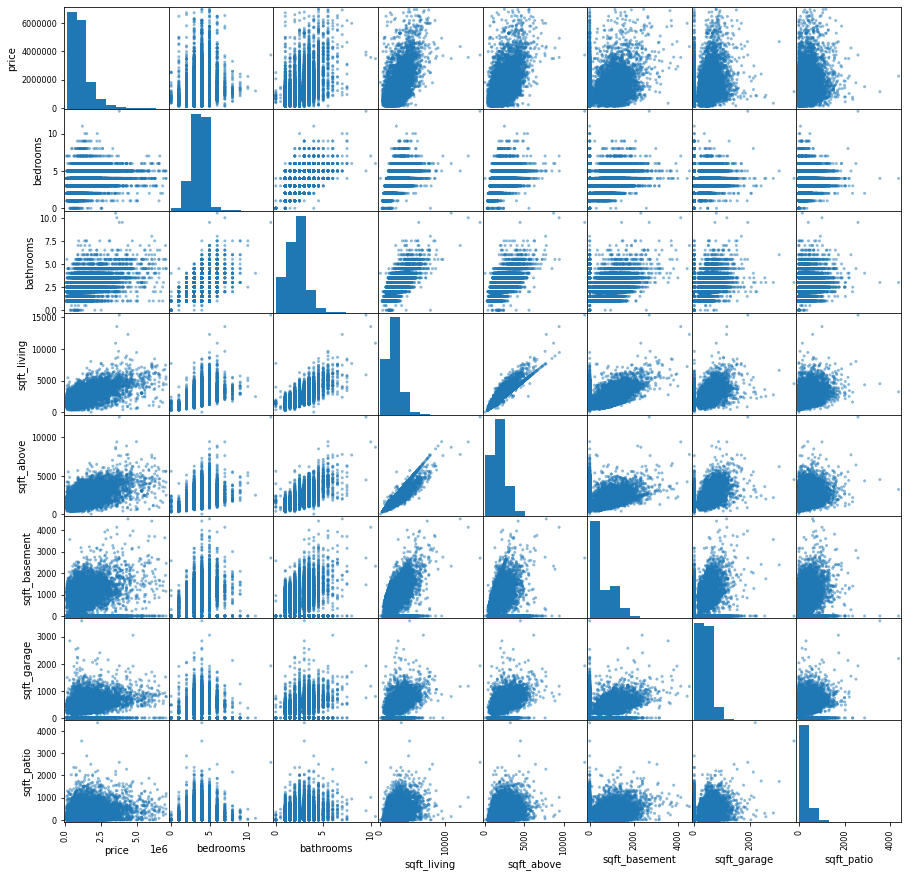

In [25]:
pd.plotting.scatter_matrix(df_numeric,figsize  = [15, 15]);

# Moving on to categories

In [33]:
df_cat = df_dropped.select_dtypes(object)
df_cat[['floors', 'price']] = df_dropped[['floors', 'price']].copy()

In [34]:
df_cat.head()

,nuisance,condition,grade,heat_source,sewer_system,floors,price
0,NO,Good,7 Average,Gas,PUBLIC,1.0,675000.0
1,YES,Average,7 Average,Oil,PUBLIC,1.0,920000.0
2,NO,Average,7 Average,Gas,PUBLIC,1.0,311000.0
3,NO,Average,9 Better,Gas,PUBLIC,2.0,775000.0
4,YES,Average,7 Average,Electricity,PUBLIC,2.0,592500.0


In [35]:
df_all_cat_reduced = df_cat.copy()

# categorical stuff

In [36]:
def check_for_category(category_column):
    
# Check how the categories in the feature compare to the price distribution
    stats = df_all_cat_reduced.groupby([category_column])['price'].describe()
    
# Creating a chart of the column categories    
    temp_list = list(df_all_cat_reduced[category_column].unique())

    fig, ax = plt.subplots(figsize=(15,10))
    sns.stripplot(x=df_all_cat_reduced[category_column], y=df_all_cat_reduced['price'])

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    colors = colors *2
    
    for i, category in enumerate(temp_list):
        z = i+1
        ax.axhline(y=df_all_cat_reduced.groupby([category_column])['price'].mean().values[i],
                   color = colors[i], label = f"{category}");
    ax.legend()

# Model the category
    y = df_numeric['price']
    X_cat = df_all_cat_reduced[[category_column]].copy()
    X_cat['sqft_living'] = df_numeric['sqft_living'].copy()
    X_cat = pd.get_dummies(X_cat, columns=[category_column], drop_first=True)

    cat_results = sm.OLS(endog = y, exog = sm.add_constant(X_cat)).fit()
    
# get a summary of the model
    cat_summary = cat_results.summary()
    return stats, cat_results, cat_summary

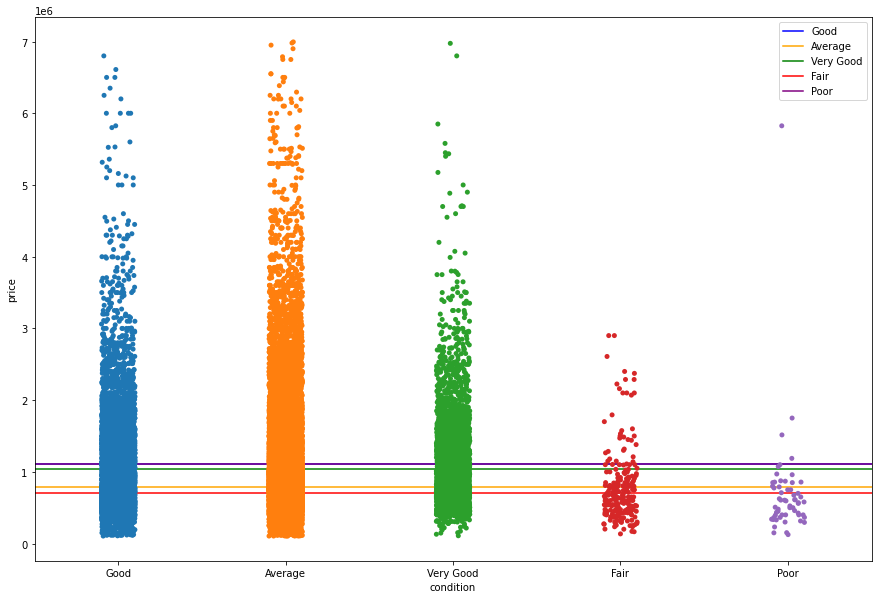

In [37]:
condition_stats, condition_results, condition_summary = check_for_category('condition')